In [20]:
import sys
from pathlib import Path

# Go up a directory to import datafawn package
parent = Path.cwd().parent   
sys.path.append(str(parent))

import datafawn
import pandas as pd

In [ ]:
EXAMPLE_DATA_PATH = "../deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5"
data = pd.read_hdf(EXAMPLE_DATA_PATH)

paws = ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']
rel_paws = ['front_left_paw_rel', 'front_right_paw_rel', 'back_left_paw_rel', 'back_right_paw_rel']
reference_map = {
    'back_base': ['front_left_paw', 'front_right_paw'],
    'tail_base': ['back_left_paw', 'back_right_paw']
}

In [36]:


rel_pp = datafawn.RelativePawPositionPostprocessor()

error_pp = datafawn.ErrorPostprocessor(
    bodyparts=rel_paws,
    use_velocity=False,
    use_likelihood=True,
    use_distance=False,
    velocity_kwargs={'threshold_pixels': 50, 'window_size': 5},
    likelihood_kwargs={'min_likelihood': 0.8},
    distance_kwargs={'reference_map': reference_map, 'max_distance': 300}
    )


In [37]:
# error_step = error_pp.process(data)
# rel_step = rel_pp.process(error_step)

rel_step = rel_pp.process(data)
error_step = error_pp.process(rel_step)

Dataframe with relative positions created:
Original shape: (615, 117)
New shape: (615, 129)

New bodyparts added:
['back_left_paw_rel', 'back_right_paw_rel', 'front_left_paw_rel', 'front_right_paw_rel']


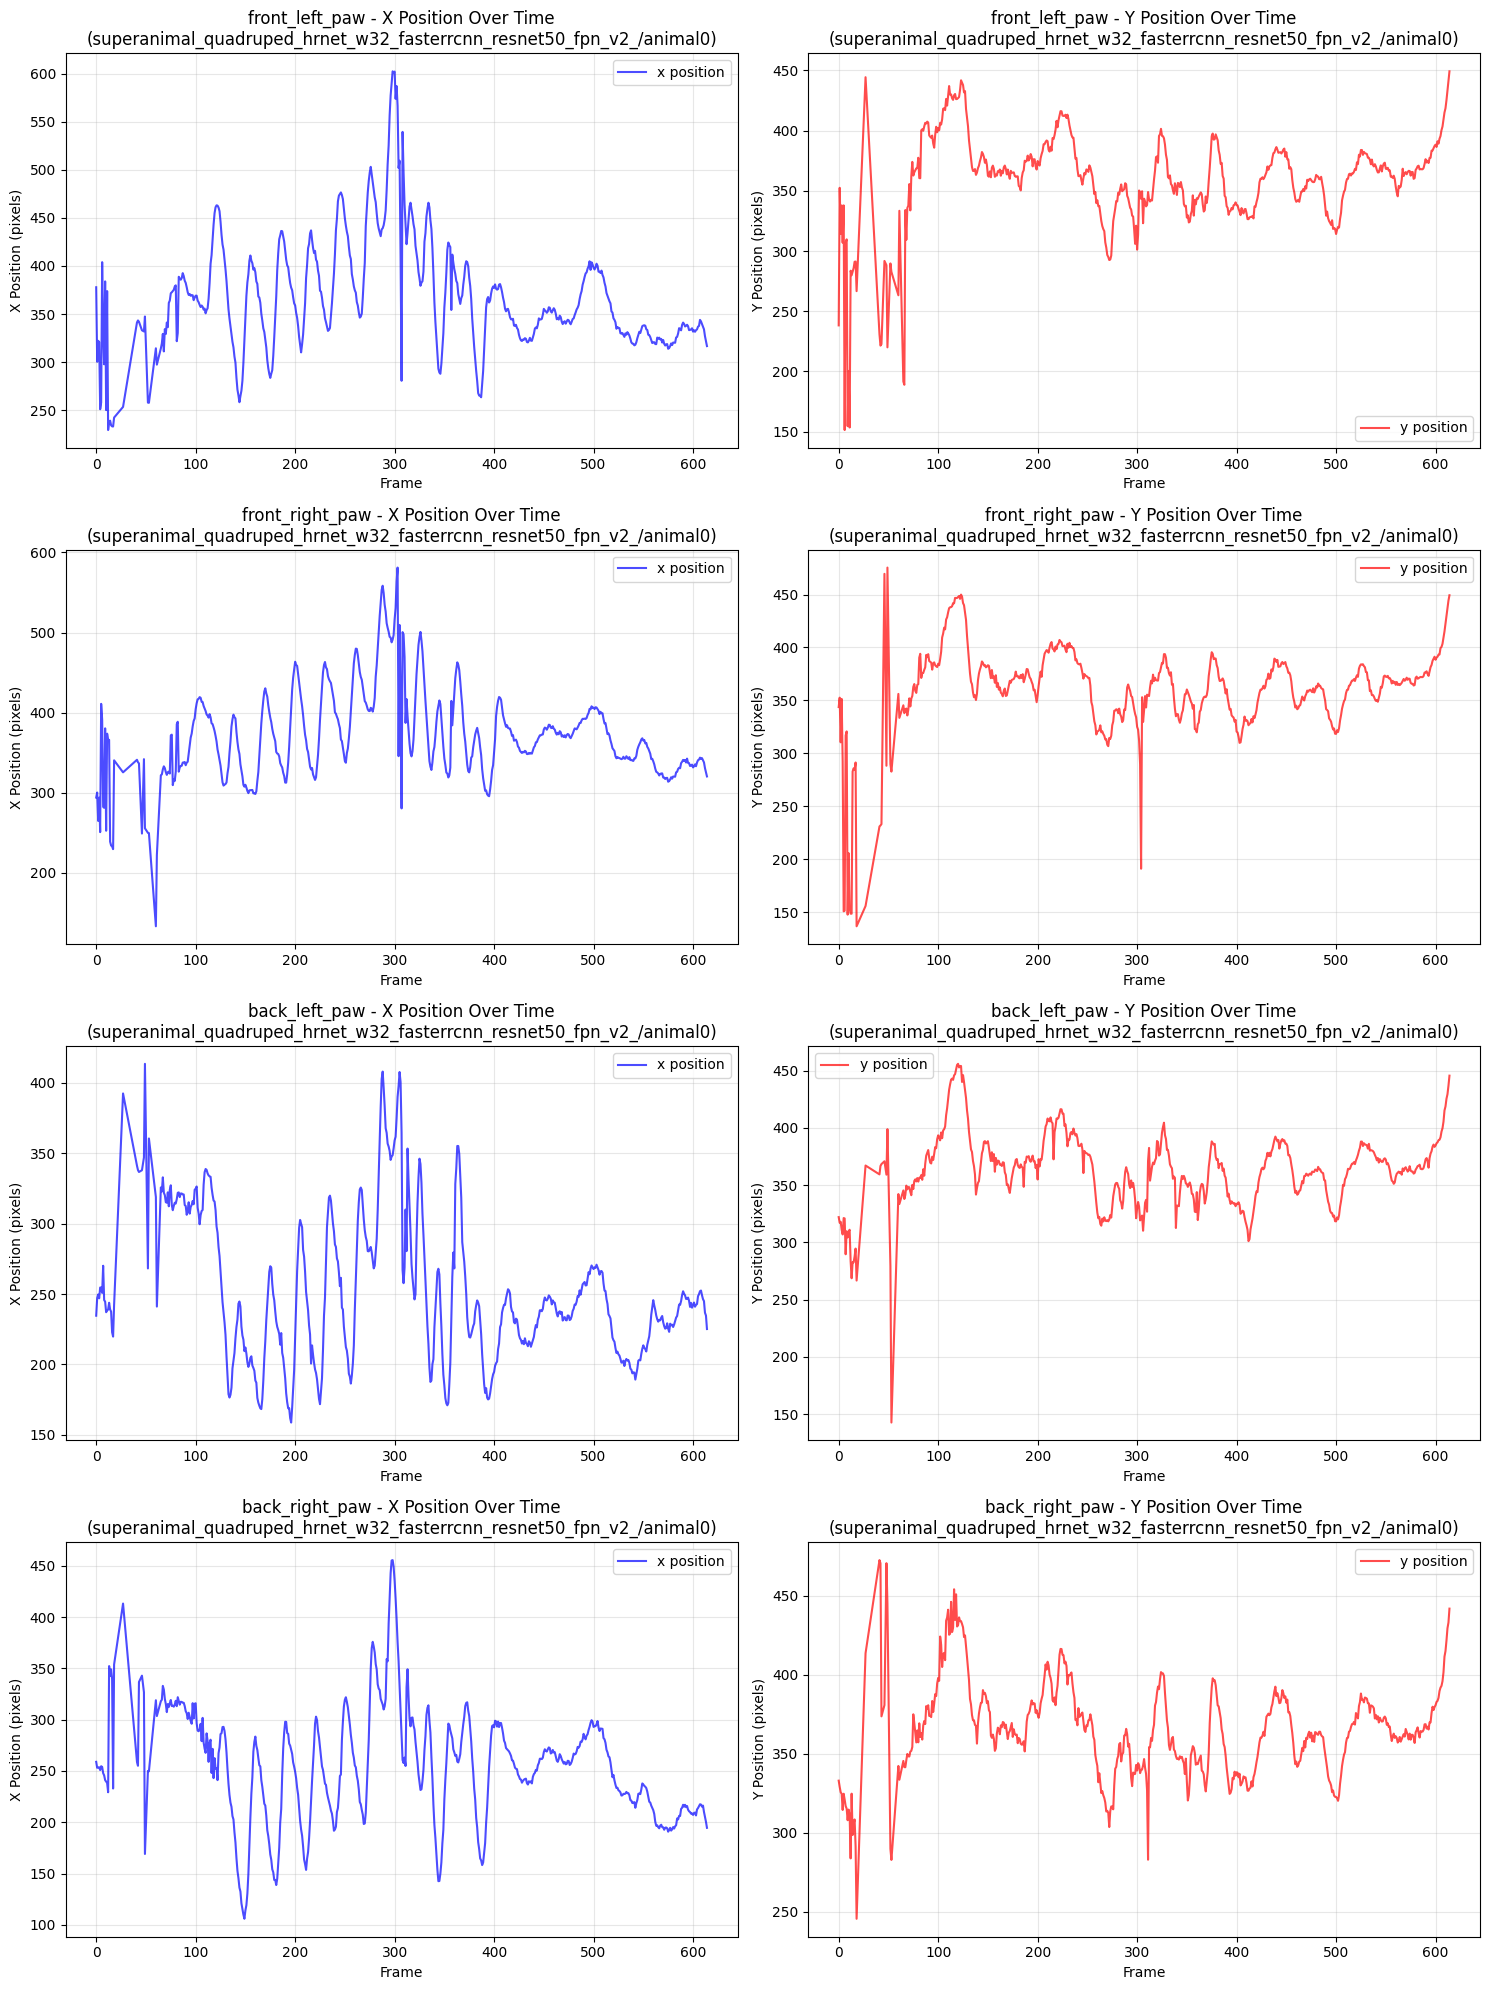

In [38]:
fig = datafawn.plot_bodyparts_position(data, bodyparts=paws)

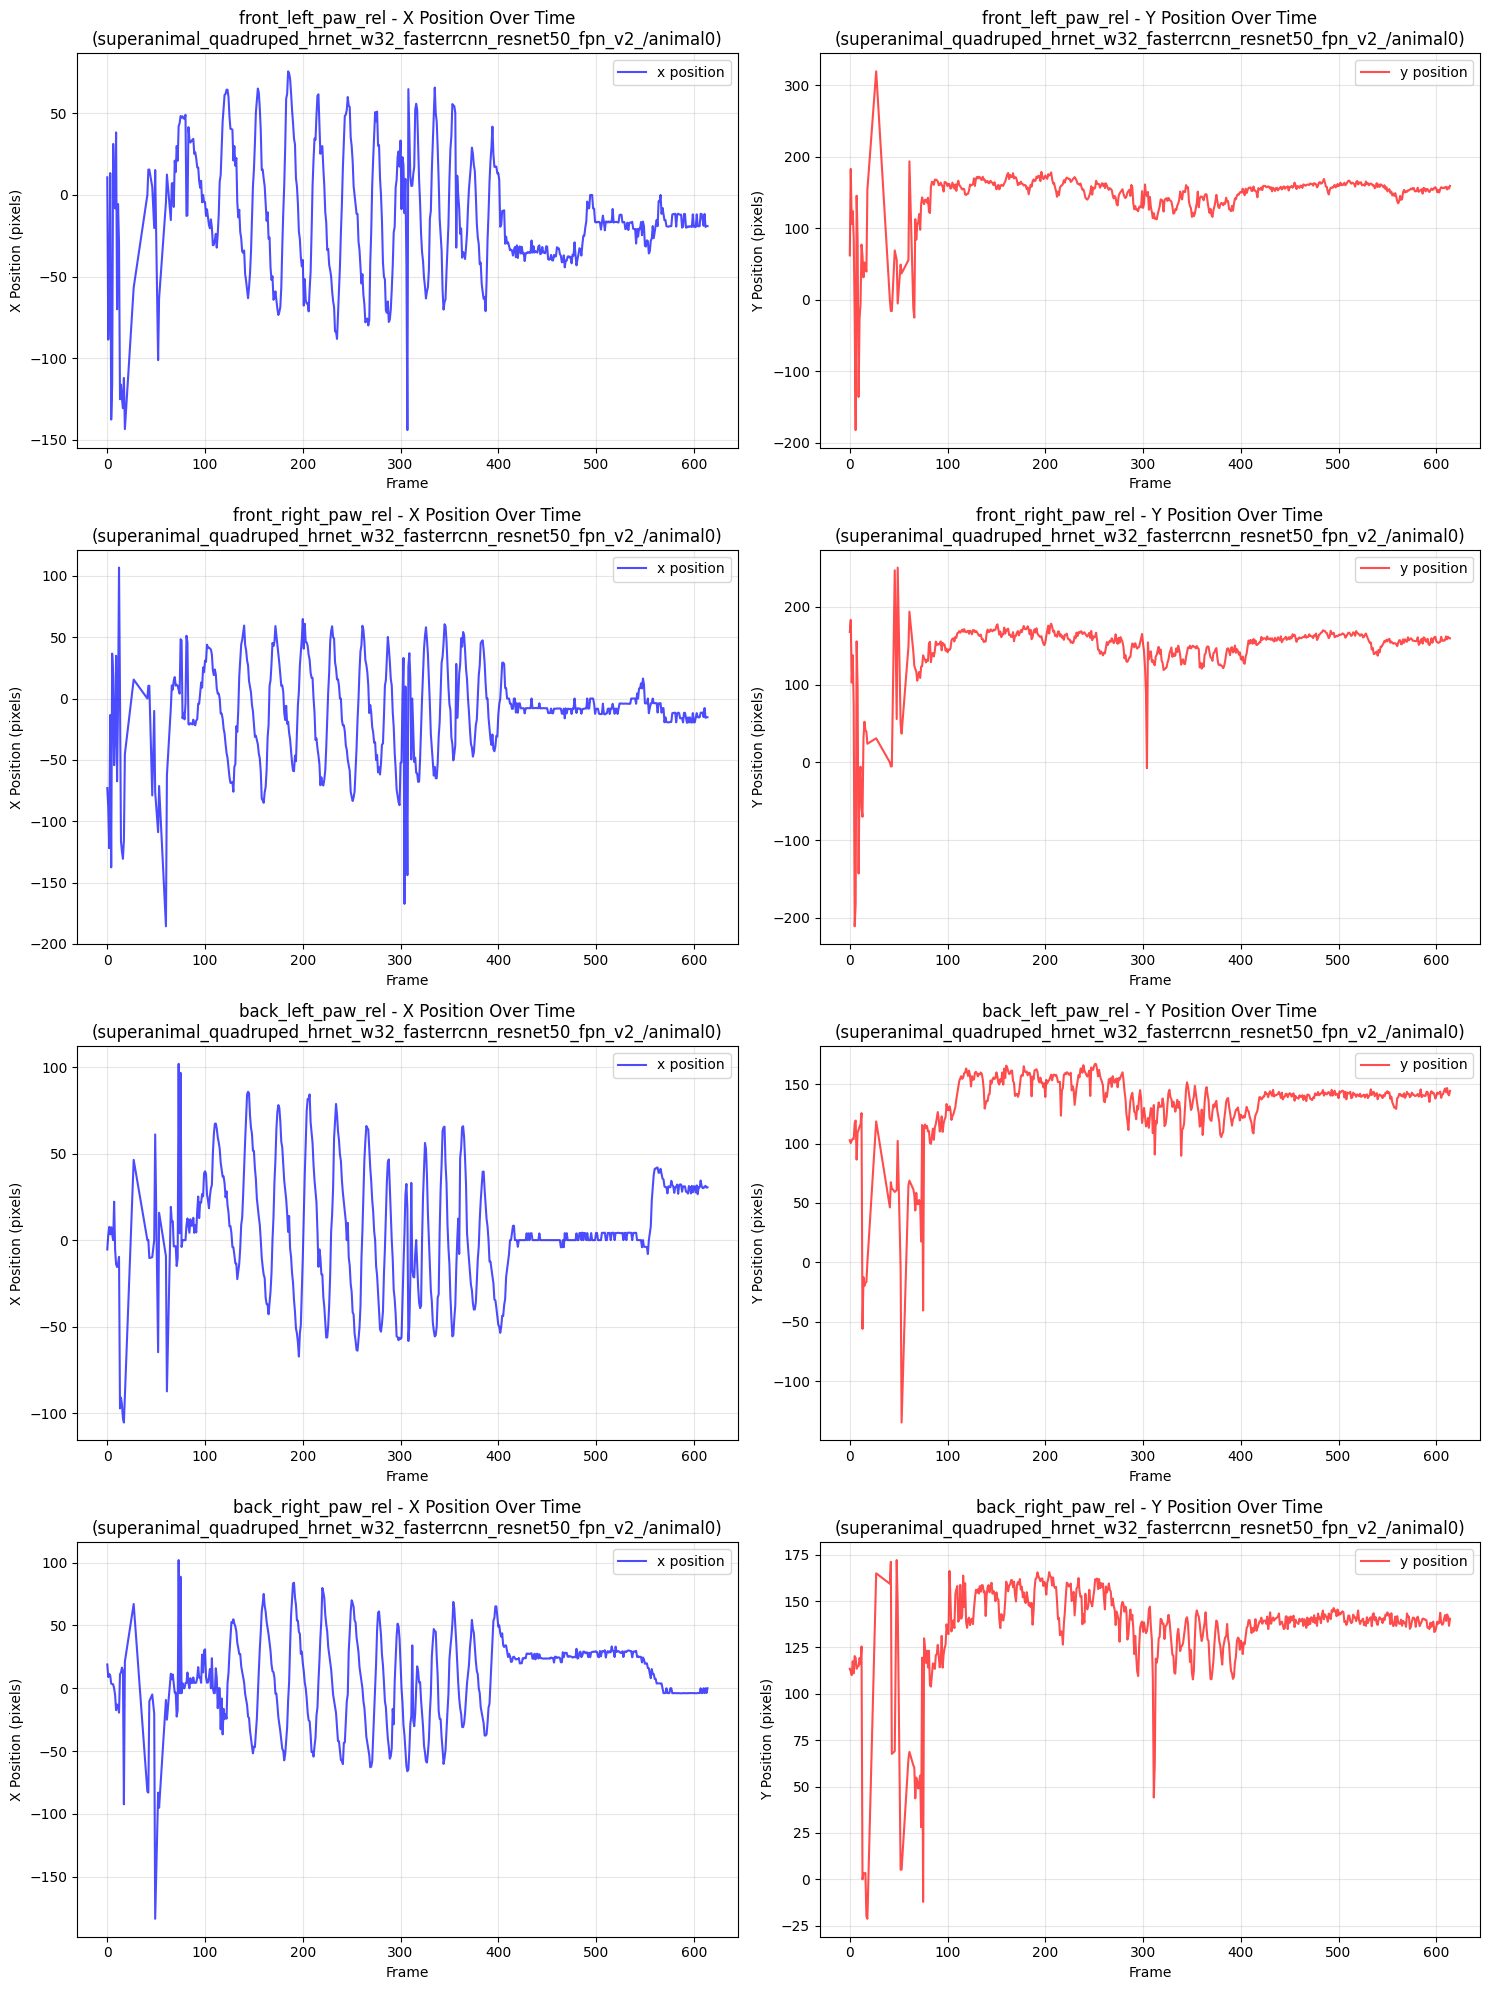

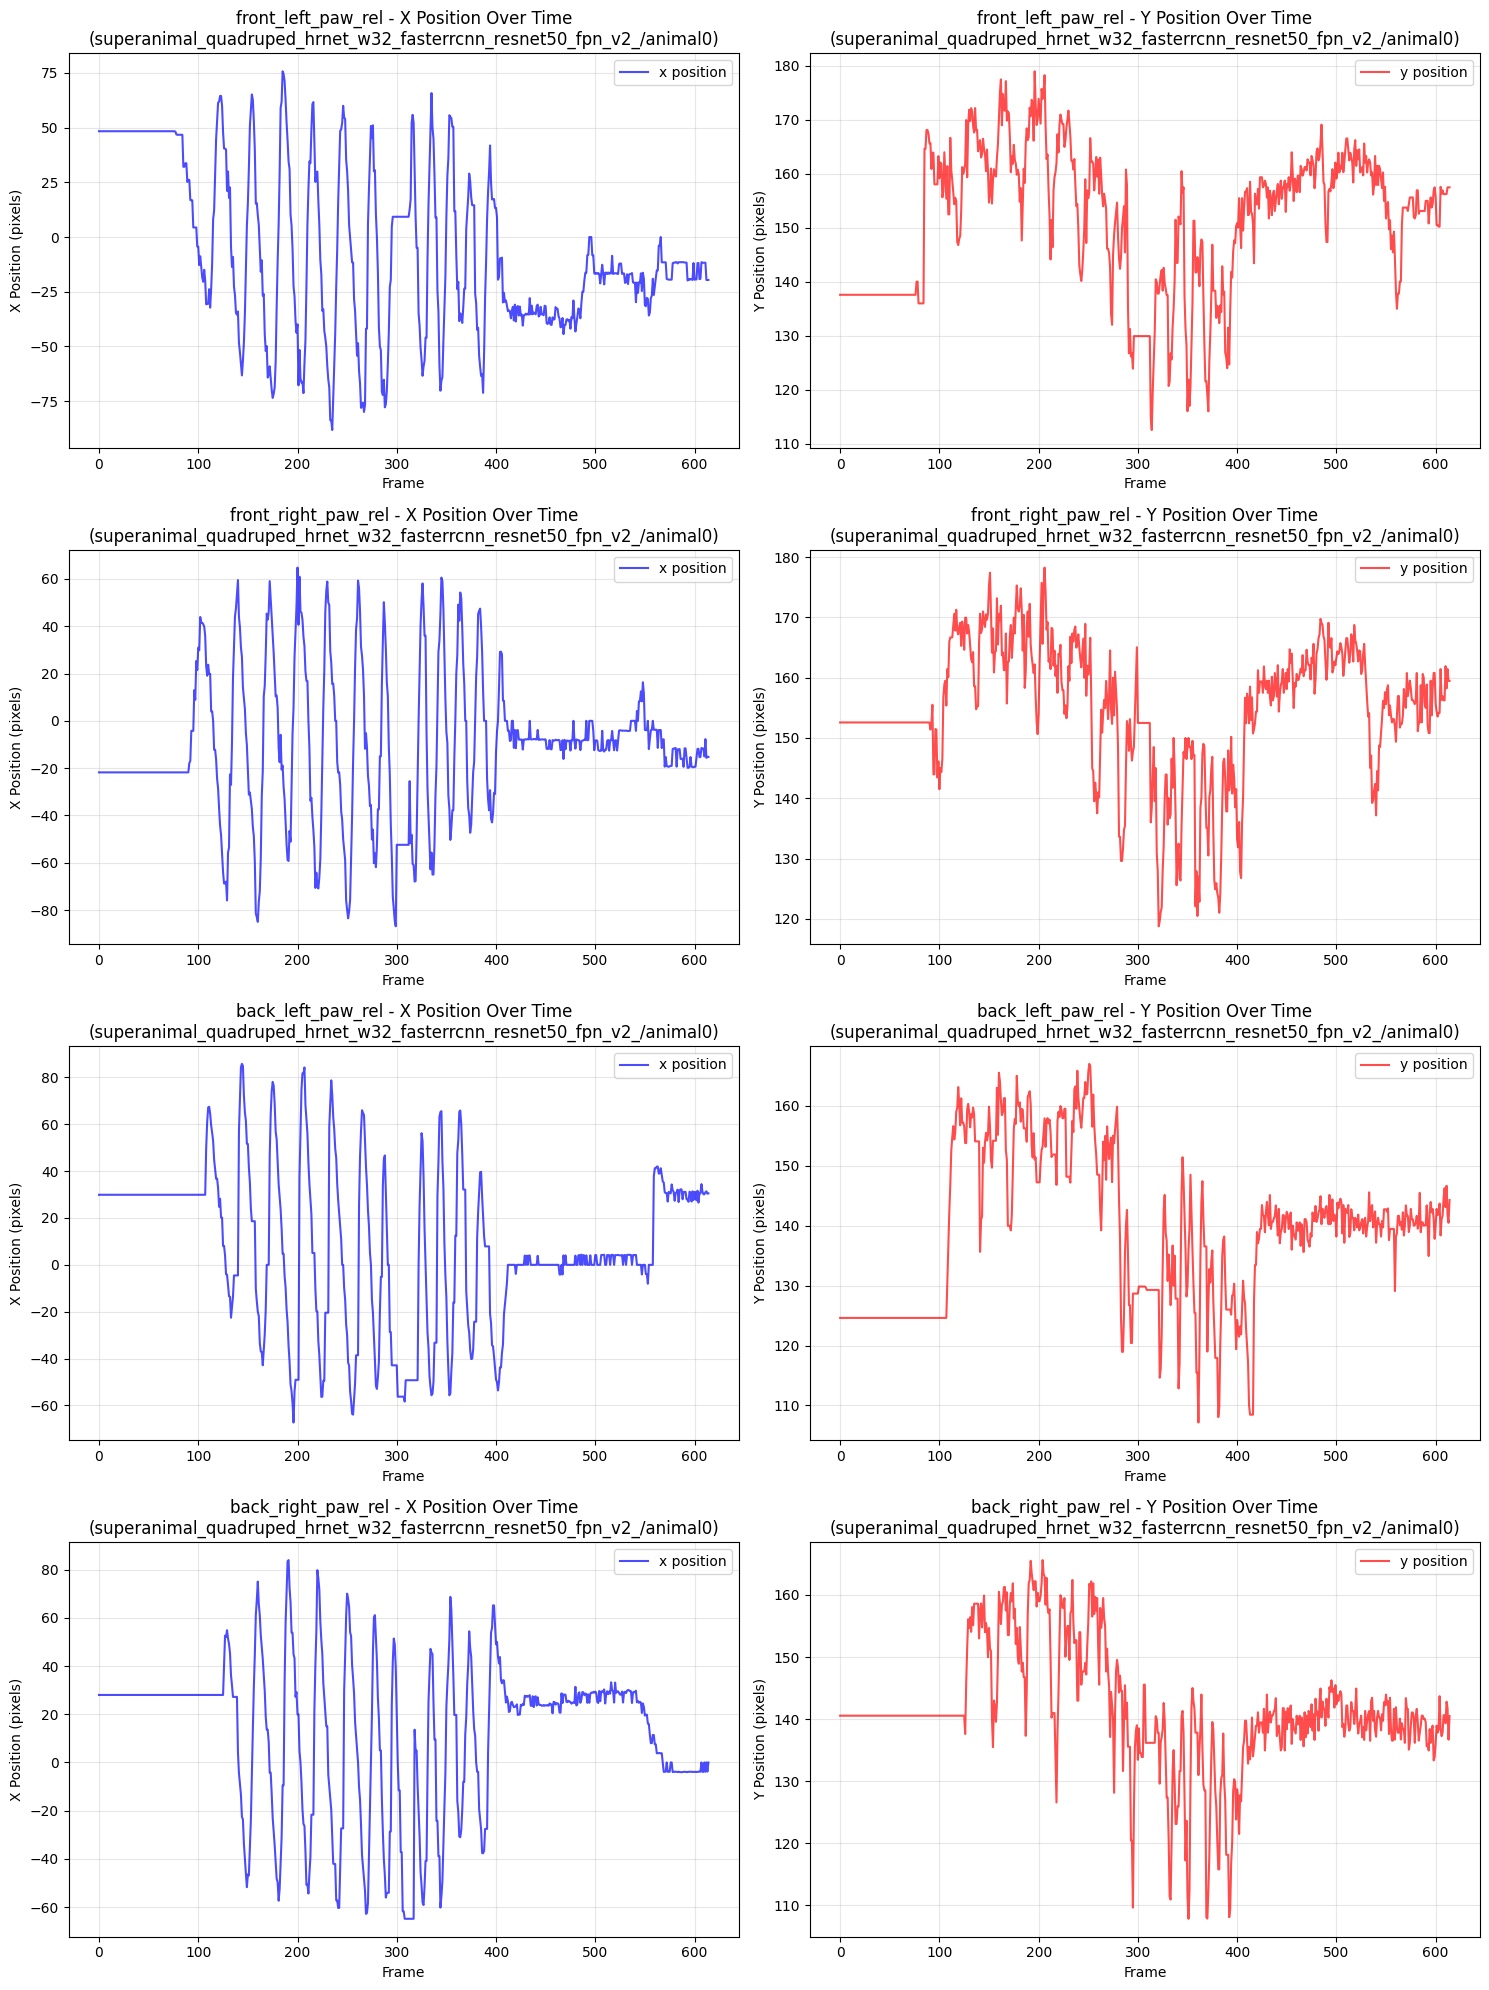

In [39]:
fig = datafawn.plot_bodyparts_position(rel_step, bodyparts=rel_paws)

fig = datafawn.plot_bodyparts_position(error_step, bodyparts=rel_paws)
